In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib
import astropy.units as u
import astropy.coordinates as coord
from astroquery.vizier import Vizier
%matplotlib inline
from astropy.io import fits
from astroquery.simbad import Simbad
import matplotlib
import aplpy
from astroquery.sdss import SDSS
from astroquery.skyview import SkyView
from astropy.coordinates import Angle
import time
from astropy.table import Table
import heapq
from math import log10, floor
import matplotlib.mlab as mlab
from bs4 import BeautifulSoup
import urllib2
from astroquery.nrao import Nrao

/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


In [3]:
#Region of Sky:

RA=196.875
DE=51.0
RA_length=35.625
DE_length=6.0

#Catalogues:

First_Catalogue_Name='LOTSS'
Second_Catalogue_Name='TGSS'

In [4]:
#Name of Flux in Catalogue..

First_Flux='FTot'
Second_Flux='Stotal'

#And their error
First_Flux_error='e_'+First_Flux
Second_Flux_error='e_'+Second_Flux

In [5]:
#Retrieving first catalogue data:
First_Catalogue_Data= Table.read('data/'+First_Catalogue_Name+'.fit', format='fits')

#Retrieving second catalogue data:
Second_Catalogue_Data= Table.read('data/'+Second_Catalogue_Name+'.fit', format='fits')

In [6]:
#Making array for first catalogue in region of the sky chosen 

n=0
RA_First=[]
DE_First=[]
Lum_First=[]
RA_First_e=[]
DE_First_e=[]
Lum_First_e=[]
while n< len(First_Catalogue_Data):
    if RA-RA_length<First_Catalogue_Data["RAJ2000"][n] and First_Catalogue_Data["RAJ2000"][n]<RA+RA_length and DE-DE_length<First_Catalogue_Data["DEJ2000"][n] and First_Catalogue_Data["DEJ2000"][n]<DE+DE_length:
        RA_First.append(First_Catalogue_Data["RAJ2000"][n])
        DE_First.append(First_Catalogue_Data["DEJ2000"][n])
        Lum_First.append(First_Catalogue_Data[First_Flux][n]/1000)
        RA_First_e.append(First_Catalogue_Data["e_RAdegtot"][n]/3600)
        DE_First_e.append(First_Catalogue_Data["e_DEdegtot"][n]/3600)
        Lum_First_e.append(First_Catalogue_Data[First_Flux_error][n]/1000)
    n=n+1

#Making array for second catalogue in region of the sky chosen  
    
n=0
RA_Second=[]
DE_Second=[]
Lum_Second=[]
RA_Second_e=[]
DE_Second_e=[]
Lum_Second_e=[]
while n< len(Second_Catalogue_Data):
    if RA-RA_length<Second_Catalogue_Data["RAJ2000"][n] and Second_Catalogue_Data["RAJ2000"][n]<RA+RA_length and DE-DE_length<Second_Catalogue_Data["DEJ2000"][n] and Second_Catalogue_Data["DEJ2000"][n]<DE+DE_length:
        RA_Second.append(Second_Catalogue_Data["RAJ2000"][n])
        DE_Second.append(Second_Catalogue_Data["DEJ2000"][n])
        Lum_Second.append(Second_Catalogue_Data[Second_Flux][n]/1000)
        RA_Second_e.append(Second_Catalogue_Data["e_RAJ2000"][n]/3600)
        DE_Second_e.append(Second_Catalogue_Data["e_DEJ2000"][n]/3600)
        Lum_Second_e.append(Second_Catalogue_Data[Second_Flux_error][n]/1000)
    n=n+1


/Users/niallbradley/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


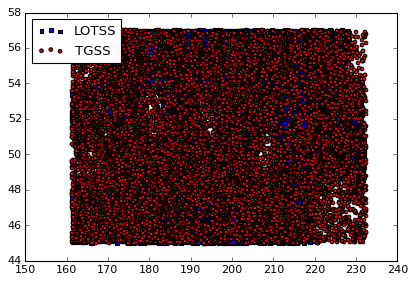

In [7]:
#Plotting coords of two arrays to compare

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(RA_First, DE_First, s=10, c='b', marker="s", label=First_Catalogue_Name)
ax1.scatter(RA_Second,DE_Second, s=10, c='r', marker="o", label=Second_Catalogue_Name)
plt.legend(loc='upper left');
plt.show()

In [9]:
start_time = time.time()
#This loop finds common stars between catalogues:

#Creating new arrays:

#Luminosities of stars in common(and error)
Lum_First_Relevant=[]
Lum_Second_Relevant=[]
Lum_First_Relevant_e=[]
Lum_Second_Relevant_e=[]

#Coordinates of stars in common(and error)
RA_First_Relevant=[]
RA_Second_Relevant=[]
DE_First_Relevant=[]
DE_Second_Relevant=[]
RA_First_Relevant_e=[]
RA_Second_Relevant_e=[]
DE_First_Relevant_e=[]
DE_Second_Relevant_e=[]

#Creating new variables

#index for first catalogue:
f=0
#index for second catalogue:
s=0
#number of iterations:
it=0
#Number of stars in both catalogues
corr=1

#While loop goes through all of first catalogue..
while f<len(RA_First):
    #If it compares a source in first catalogue to every source in second without finding one in common then..
    if s==len(RA_Second):
        #It moves on to next source in first and..
        f=f+1
        #Starts comparing it to the first source in the second catalogue
        s=0
    #This is a formula for overlapping rectangles with the sides being the error
    #If this is true catalogues have that source in common
    elif RA_First_e[f]+RA_Second_e[s]>= abs(RA_First[f]-RA_Second[s]) and DE_First_e[f]+DE_Second_e[s]>= abs(DE_First[f]-DE_Second[s]):
        #Making arrays of flux of sources in common (and error)
        Lum_First_Relevant.append((Lum_First[f]))
        Lum_Second_Relevant.append(Lum_Second[s])
        Lum_First_Relevant_e.append((Lum_First_e[f]))
        Lum_Second_Relevant_e.append(Lum_Second_e[s])
        
        #Making arrays of coordinates of sources in common 
        RA_First_Relevant.append(RA_First[f])
        RA_Second_Relevant.append(RA_Second[s])
        RA_First_Relevant_e.append(RA_First_e[f])
        RA_Second_Relevant_e.append(RA_Second_e[s])
        DE_First_Relevant.append(DE_First[f])
        DE_Second_Relevant.append(DE_Second[s])
        DE_First_Relevant_e.append(DE_First_e[f])
        DE_Second_Relevant_e.append(DE_Second_e[s])
        
        #Number of common sources increased
        corr=corr+1
        #Move onto next source in first catalogue
        f=f+1
        #Starts comparing it to the first source in the second catalogue
        s=0
    #If neither of these are true then..
    else:
        #Try next source in second catalogue
        s=s+1
    #Before going onto next loop increase number of iterations
    it=it+1
print("--- %s seconds ---" % (time.time() - start_time))

--- 373.606760979 seconds ---


In [10]:
print "Number of iterations:",it
print "Number of stars corrolated:",corr

Number of iterations: 398647014
Number of stars corrolated: 7373


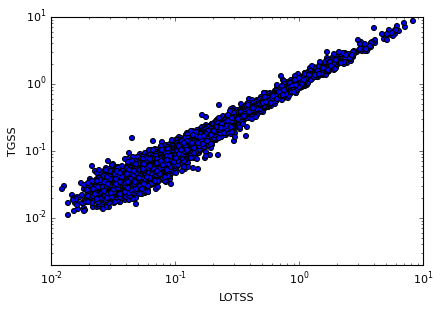

In [11]:
#Plotting Luminosities (unit Jy, log scale)

if corr>0:
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(Lum_First_Relevant, Lum_Second_Relevant)
    plt.xlabel(First_Catalogue_Name)
    plt.ylabel(Second_Catalogue_Name)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0.01,10)
    plt.ylim(0,10)
    plt.show()

In [15]:
#Defining new variables
Lum_Ratio=0
n=0
m=0
Lum_Ratio_List=[]

#This loop goes through the whole lists of common sources

while n<corr-1:
    
    #Calculates nth ratio of luminosities
    if Lum_First_Relevant[n]>Lum_Second_Relevant[n]:
        Lum_Ratio=Lum_First_Relevant[n]/Lum_Second_Relevant[n]
    else:
        Lum_Ratio=Lum_Second_Relevant[n]/Lum_First_Relevant[n]
    #Creates an array of ratios
    Lum_Ratio_List.append(Lum_Ratio)
    n=n+1
#When loop is finished it will have found the biggest change in the list

0.133882074719
0.14905342084


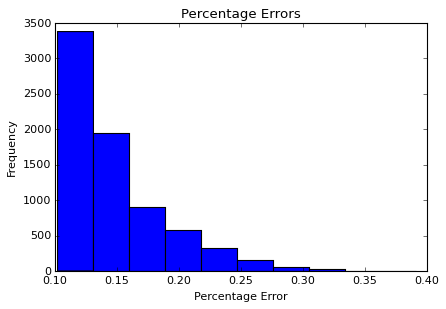

In [16]:
#Some simple statistical analyses on the code:

#Creat new array and variable
total_percentage_errors_list=[]
n=0

#This loop goes through the list of fractional changes and..
while n<len(Lum_Ratio_List):
    
    #..calculates the error on these changes before..
    error_first=(Lum_First_Relevant_e[n]/Lum_First_Relevant[n])
    error_second=(Lum_Second_Relevant_e[n]/Lum_Second_Relevant[n])
    
    total_percentage_error=error_first+error_second

    
    #..adding them to the new list.
    total_percentage_errors_list.append(total_percentage_error)
    
    n=n+1

#Plotting the errors in a histogram
plt.hist(total_percentage_errors_list)
plt.title("Percentage Errors")
plt.xlabel("Percentage Error")
plt.ylabel("Frequency")
fig = plt.gcf()

#Calculating the mean and the median:
mean=np.mean(total_percentage_errors_list)
med= np.median(total_percentage_errors_list)
print med
print mean

In [21]:
#FIRST VARIATION

def round_to_1(x):
    return round(x, -int(floor(log10(abs(x)))))


#Number of sources with largest changes in flux you want:
size=10
#Radius you want simbad to loop at:
sim_rad='50' #in arcseconds

#Create a list of the largest changes in flux:
Largest_Changes=sorted(Lum_Ratio_List,reverse=True)

#Creat new lists:
Big_Change_indexes=[]
Big_Change_RAs=[]
Big_Change_DEs=[]

#Creat new variables:
n=0
m=0
RS=0
Gal=0
Qua=0
Pul=0
Oth=0

#This loop goes through the "Largest_Fractional_Diffs" list and...
while m<size:
    
    #If this loop runs through through the whole list of fractional changes 
    #before getting the specified number of results then..
    if n>=len(Largest_Changes):
        print "No other sources meet criterea"
        break
    
    #If it hasn't run through list then it finds indexes..
    ind= Lum_Ratio_List.index(Largest_Changes[n])
 
     #..then calculates the errors relating to each change
    error_first=(Lum_First_Relevant_e[ind]/Lum_First_Relevant[ind])
    error_second=(Lum_Second_Relevant_e[ind]/Lum_Second_Relevant[ind])
    total_percentage_error=error_first+error_second
    total_error=round_to_1(total_percentage_error*Largest_Changes[n])
    
     #This finds all the objects on Simbad within 10" of the relevant source
    Simbad_table=Simbad.query_region(coord.SkyCoord(RA_First_Relevant[ind], DE_First_Relevant[ind],unit=(u.deg, u.deg)),radius='0d0m'+sim_rad+'s')
    
    #This loop only prints information if the percentage error on the data is below a certain threshold
    if  (Largest_Changes[n]-1)/total_error>=3.0:
    
        #Creates lists of their indexes and coordinates...
        Big_Change_indexes.append(ind)
        Big_Change_RAs.append(RA_First_Relevant[ind])
        Big_Change_DEs.append(DE_First_Relevant[ind])
        
        #printing relevant information:
        print m,":"
        print "Ratio of fluxes:",Largest_Changes[n],"±",total_error
        print "Respective fluxes:",Lum_First_Relevant[ind],Lum_Second_Relevant[ind]
        print "Coordinates:",RA_First_Relevant[ind],DE_First_Relevant[ind]
        print "Total percentage error:",round_to_1(total_percentage_error)
        
        #If no source is found on Simbad then..
        if not Simbad_table:
            #..print this:
            print "==>no source found on SIMBAD"
        #If there is source(s) found then...
        else:
            #print relevant information from Simbad
            print Simbad_table["MAIN_ID","RA","DEC"]
            Link="http://simbad.u-strasbg.fr/simbad/sim-id?Ident="+(Simbad_table["MAIN_ID"][0].replace("+","%2B")).replace(" ", "+")+"&NbIdent=1&Radius="+sim_rad+"&Radius.unit=arcsec&submit=submit+id"
            print Link
            
            #Extracting Otype from link
            html_page = urllib2.urlopen(Link)
            soup = BeautifulSoup(html_page)
            HTML_Text=soup.get_text()
            index = HTML_Text.index("--")
            Otype=HTML_Text[index:index+25]
            
            #printing Otype
            print "Type",Otype
            
            #Finding total number of all the different types
            if 'Galaxy' in Otype:
                Gal=Gal+1
            elif 'galaxy' in Otype:
                Gal=Gal+1
            elif'BL Lac'in Otype:
                Gal=Gal+1
            elif 'Super' in Otype:
                Gal=Gal+1
            elif "Radio-source" in Otype:
                RS=RS+1
            elif "Quasar" in Otype:
                Qua=Qua+1
            elif "Pulsar" in Otype:
                Pul=Pul+1
            else:
                Oth=Oth+1
        
        #Skip some lines
        print ""
        print ""
        print ""
        m=m+1
    n=n+1

#Print what sources were found
print "Number of Radio Sources:",RS
print "Number of Galaxies:",Gal
print "Number of Quasar:",Qua
print "Number of Pulsars:",Pul
print "Number of Other Sources:",Oth

0 :
Change in flux: 3.53010156831 ± 0.4
Respective fluxes: 0.04461628 0.1575
Coordinates: 203.036 47.11892
Total percentage error: 0.1
==>no source found on SIMBAD



1 :
Change in flux: 2.92474654088 ± 0.6
Respective fluxes: 0.09300694 0.0318
Coordinates: 183.68359 54.58016
Total percentage error: 0.2
==>no source found on SIMBAD



2 :
Change in flux: 2.91629297913 ± 0.5
Respective fluxes: 0.15368864 0.0527
Coordinates: 186.47155 53.15344
Total percentage error: 0.2
==>no source found on SIMBAD



3 :
Change in flux: 2.71487944864 ± 0.5
Respective fluxes: 0.02147425 0.0583
Coordinates: 217.38867 47.25709
Total percentage error: 0.2
==>no source found on SIMBAD



4 :
Change in flux: 2.52373371429 ± 0.3
Respective fluxes: 0.2208267 0.0875
Coordinates: 171.05381 51.56387
Total percentage error: 0.1
        MAIN_ID                RA           DEC     
                            "h:m:s"       "d:m:s"   
------------------------ ------------- -------------
 2MASS J11241315+5133494 11 24 

In [24]:
#SECOND VARIATION

#Number of sources with largest changes in flux you want:
size=30
#Radius you want simbad to loop at:
sim_rad='10'#in arcseconds

#Create a list of the largest changes in flux:
Largest_Changes=sorted(Lum_Ratio_List,reverse=True)

#Creat new lists:
Big_Change_indexes=[]
Big_Change_RAs=[]
Big_Change_DEs=[]

#Creat new variables:
n=0
m=0
RS=0
Gal=0
Qua=0
Pul=0
Oth=0

#This loop goes through the "Largest_Fractional_Diffs" list and...
while m<size:
    
    #If this loop runs through through the whole list of fractional changes 
    #before getting the specified number of results then..
    if n>=len(Largest_Changes):
        #...print this and stop the loop
        print "No other sources meet criterea"
        break
    
    #If it hasn't run through list then it finds indexes..
    ind= Lum_Ratio_List.index(Largest_Changes[n])
    
     #..then calculates the errors relating to each change
    error_first=(Lum_First_Relevant_e[ind]/Lum_First_Relevant[ind])
    error_second=(Lum_Second_Relevant_e[ind]/Lum_Second_Relevant[ind])
    total_percentage_error=error_first+error_second
    total_error=round_to_1(total_percentage_error*Largest_Changes[n])
    
    try:
        Simbad_table=Simbad.query_region(coord.SkyCoord(RA_First_Relevant[ind], DE_First_Relevant[ind],unit=(u.deg, u.deg)),radius='0d0m'+sim_rad+'s')
    except EOFError:
        print "EOFError"
        n=n+1
        continue
    #This loop only prints information if it can be found on Simbad:
    if  Simbad_table and (Largest_Changes[n]-1)/total_error>=3.0:
        
        #Creates lists of their indexes and coordinates...
        Big_Change_indexes.append(ind)
        Big_Change_RAs.append(RA_First_Relevant[ind])
        Big_Change_DEs.append(DE_First_Relevant[ind])
        
        #printing relevant information:
        print m,":"
        print "Ratio of fluxes:",Largest_Changes[n],"±",total_error
        print "Respective fluxes:",Lum_First_Relevant[ind],Lum_Second_Relevant[ind]
        print "Coordinates:",RA_First_Relevant[ind],DE_First_Relevant[ind]
        print "Total percentage error:",round_to_1(total_percentage_error)
        
        #Printing Simbad information
        print Simbad_table["MAIN_ID","RA","DEC"]
        Link="http://simbad.u-strasbg.fr/simbad/sim-id?Ident="+(Simbad_table["MAIN_ID"][0].replace("+","%2B")).replace(" ", "+")+"&NbIdent=1&Radius="+sim_rad+"&Radius.unit=arcsec&submit=submit+id"
        print Link
        
        #Extracting Otype from link
        html_page = urllib2.urlopen(Link)
        soup = BeautifulSoup(html_page)
        HTML_Text=soup.get_text()
        index = HTML_Text.index("--")
        Otype=HTML_Text[index:index+25]
        
        #printing Otype
        print "Type",Otype
        
        #Finding total number of all the different types
        if 'Galaxy' in Otype:
            Gal=Gal+1
        elif 'galaxy' in Otype:
            Gal=Gal+1
        elif'BL Lac'in Otype:
            Gal=Gal+1
        elif 'Super' in Otype:
            Gal=Gal+1
        elif "Radio-source" in Otype:
            RS=RS+1
        elif "Quasar" in Otype:
            Qua=Qua+1
        elif "Pulsar" in Otype:
            Pul=Pul+1
        else:
            Oth=Oth+1
            
        #Skip some lines
        print ""
        print ""
        print ""
        m=m+1
    n=n+1
    
#Print what sources were found
print "Number of Radio Sources:",RS
print "Number of Galaxies:",Gal
print "Number of Quasar:",Qua
print "Number of Pulsars:",Pul
print "Number of Other Sources:",Oth

0 :
Ratio of fluxes: 2.52373371429 ± 0.3
Respective fluxes: 0.2208267 0.0875
Coordinates: 171.05381 51.56387
Total percentage error: 0.1
        MAIN_ID               RA           DEC     
                           "h:m:s"       "d:m:s"   
----------------------- ------------- -------------
2MASS J11241315+5133494 11 24 13.1664 +51 33 49.356
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=2MASS+J11241315%2B5133494&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id
Type -- 
BL Lac - type object




1 :
Ratio of fluxes: 2.40853174603 ± 0.4
Respective fluxes: 0.0910425 0.0378
Coordinates: 169.99223 46.03798
Total percentage error: 0.2
      MAIN_ID            RA          DEC     
                      "h:m:s"      "d:m:s"   
------------------- ------------ ------------
NVSS J111958+460214 11 19 58.265 +46 02 16.98
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J111958%2B460214&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id
Type -- 
Brightest galaxy in a



2 :
Ratio of

In [45]:
#THIRD VARIATION

#Number of sources with largest changes in flux you want:
size=10
#Radius you want simbad to loop at:
sim_rad='10' #in arcseconds

#Create a list of the largest changes in flux:
Largest_Changes=sorted(Lum_Ratio_List,reverse=True)

#Creat new lists:
Big_Change_indexes=[]
Big_Change_RAs=[]
Big_Change_DEs=[]

#Creat new variables:
n=0
m=0
RS=0
Gal=0
Qua=0
Pul=0
Oth=0

#This loop goes through the "Largest_Fractional_Diffs" list and...
while m<size:
    
    #If this loop runs through through the whole list of fractional changes 
    #before getting the specified number of results then..
    if n>=len(Largest_Changes):
        print "No other sources meet criterea"
        break
    
    #If it hasn't run through list then it finds indexes..
    ind= Lum_Ratio_List.index(Largest_Changes[n])
 
     #..then calculates the errors relating to each change
    error_first=(Lum_First_Relevant_e[ind]/Lum_First_Relevant[ind])
    error_second=(Lum_Second_Relevant_e[ind]/Lum_Second_Relevant[ind])
    total_percentage_error=error_first+error_first
    total_error=round_to_1(total_percentage_error*Largest_Changes[n])
    
     #This finds all the objects on Simbad within 10" of the relevant source
    #Simbad_table=Simbad.query_region(coord.SkyCoord(RA_First_Relevant[ind], DE_First_Relevant[ind],unit=(u.deg, u.deg)),radius='0d0m'+sim_rad+'s')
    try:
        Simbad_table=Simbad.query_region(coord.SkyCoord(RA_First_Relevant[ind], DE_First_Relevant[ind],unit=(u.deg, u.deg)),radius='0d0m'+sim_rad+'s')
    except EOFError:
        print "EOFError"
        n=n+1
        continue
        
    #This loop only prints information if the percentage error on the data is below a certain threshold
    if  total_percentage_error<=0.15 and (Largest_Changes[n]-1)/total_error>=3.0:
        
        
        #Creates lists of their indexes and coordinates...
        Big_Change_indexes.append(ind)
        Big_Change_RAs.append(RA_First_Relevant[ind])
        Big_Change_DEs.append(DE_First_Relevant[ind])
        
        #printing relevant information:
        print m,":"
        print "Ratio of fluxes:",Largest_Changes[n],"±",total_error
        print "Respective fluxes:",Lum_First_Relevant[ind],Lum_Second_Relevant[ind]
        print "Coordinates:",RA_First_Relevant[ind],DE_First_Relevant[ind]
        print "Total percentage error:",round_to_1(total_percentage_error)
        
        #If no source is found on Simbad then..
        if not Simbad_table:
            #..print this:
            print "==>no source found on SIMBAD"
        else:
            #print relevant information from Simbad
            print Simbad_table["MAIN_ID","RA","DEC"]
            Link="http://simbad.u-strasbg.fr/simbad/sim-id?Ident="+(Simbad_table["MAIN_ID"][0].replace("+","%2B")).replace(" ", "+")+"&NbIdent=1&Radius="+sim_rad+"&Radius.unit=arcsec&submit=submit+id"
            print Link
        
            #Extracting Otype from link
            html_page = urllib2.urlopen(Link)
            soup = BeautifulSoup(html_page)
            HTML_Text=soup.get_text()
            index = HTML_Text.index("--")
            Otype=HTML_Text[index:index+25]
        
            #printing Otype
            print "Type",Otype
        
            #Finding total number of all the different types
            if 'Galaxy' in Otype:
                Gal=Gal+1
            elif 'galaxy' in Otype:
                Gal=Gal+1
            elif'BL Lac'in Otype:
                Gal=Gal+1
            elif 'Super' in Otype:
                Gal=Gal+1
            elif "Radio-source" in Otype:
                RS=RS+1
            elif "Quasar" in Otype:
                Qua=Qua+1
            elif "Pulsar" in Otype:
                Pul=Pul+1
            else:
                Oth=Oth+1
            
        #Skip some lines
        print ""
        print ""
        print ""
        m=m+1
    n=n+1
    
#Print what sources were found
print "Number of Radio Sources:",RS
print "Number of Galaxies:",Gal
print "Number of Quasar:",Qua
print "Number of Pulsars:",Pul
print "Number of Other Sources:",Oth

0 :
Ratio of fluxes: 3.53010156831 ± 0.1
Respective fluxes: 0.04461628 0.1575
Coordinates: 203.036 47.11892
Total percentage error: 0.03
==>no source found on SIMBAD



1 :
Ratio of fluxes: 2.95759814815 ± 0.3
Respective fluxes: 0.04791309 0.0162
Coordinates: 172.19465 50.64632
Total percentage error: 0.1
==>no source found on SIMBAD



2 :
Ratio of fluxes: 2.92474654088 ± 0.08
Respective fluxes: 0.09300694 0.0318
Coordinates: 183.68359 54.58016
Total percentage error: 0.03
==>no source found on SIMBAD



3 :
Ratio of fluxes: 2.91629297913 ± 0.2
Respective fluxes: 0.15368864 0.0527
Coordinates: 186.47155 53.15344
Total percentage error: 0.05
==>no source found on SIMBAD



4 :
Ratio of fluxes: 2.71487944864 ± 0.3
Respective fluxes: 0.02147425 0.0583
Coordinates: 217.38867 47.25709
Total percentage error: 0.09
==>no source found on SIMBAD



5 :
Ratio of fluxes: 2.63099701493 ± 0.07
Respective fluxes: 0.07051072 0.0268
Coordinates: 201.21004 56.65039
Total percentage error: 0.03
==>no s

In [ ]:
#FOURTH VARIATION

#Number of sources with largest changes in flux you want:
size=130
#Radius you want simbad to loop at:
sim_rad='10' #in arcseconds

#Create a list of the largest changes in flux:
Largest_Changes=sorted(Lum_Ratio_List,reverse=True)

#Creat new lists:
Big_Change_indexes=[]
Big_Change_RAs=[]
Big_Change_DEs=[]

#Creat new variables:
n=0
m=0
RS=0
Gal=0
Qua=0
Pul=0
Oth=0

#This loop goes through the "Largest_Fractional_Diffs" list and...
while m<size:
    
    #If this loop runs through through the whole list of fractional changes 
    #before getting the specified number of results then..
    if n>=len(Largest_Changes):
        print "No other sources meet criterea"
        break
    
    #If it hasn't run through list then it finds indexes..
    ind= Lum_Ratio_List.index(Largest_Changes[n])
 
     #..then calculates the errors relating to each change
    error_first=(Lum_First_Relevant_e[ind]/Lum_First_Relevant[ind])
    error_second=(Lum_Second_Relevant_e[ind]/Lum_Second_Relevant[ind])
    total_percentage_error=error_first+error_first
    total_error=round_to_1(total_percentage_error*Largest_Changes[n])
    
     #This finds all the objects on Simbad within 10" of the relevant source
    #Simbad_table=Simbad.query_region(coord.SkyCoord(RA_First_Relevant[ind], DE_First_Relevant[ind],unit=(u.deg, u.deg)),radius='0d0m'+sim_rad+'s')
    try:
        Simbad_table=Simbad.query_region(coord.SkyCoord(RA_First_Relevant[ind], DE_First_Relevant[ind],unit=(u.deg, u.deg)),radius='0d0m'+sim_rad+'s')
    except EOFError:
        print "EOFError"
        n=n+1
        continue
        
    
    #This loop only prints information if the percentage error on the data is below a certain threshold
    #And there's data available on Simbad
    if  total_percentage_error<=0.15 and Simbad_table and (Largest_Changes[n]-1)/total_error>=3.0:

        #Creates lists of their indexes and coordinates...
        Big_Change_indexes.append(ind)
        Big_Change_RAs.append(RA_First_Relevant[ind])
        Big_Change_DEs.append(DE_First_Relevant[ind])
        
        #printing relevant information:
        print m,":"
        print "Ratio of fluxes:",Largest_Changes[n],"±",total_error
        print "Respective fluxes:",Lum_First_Relevant[ind],Lum_Second_Relevant[ind]
        print "Coordinates:",RA_First_Relevant[ind],DE_First_Relevant[ind]
        print "Total percentage error:",round_to_1(total_percentage_error)
        

        #print relevant information from Simbad
        print Simbad_table["MAIN_ID","RA","DEC"]
        Link="http://simbad.u-strasbg.fr/simbad/sim-id?Ident="+(Simbad_table["MAIN_ID"][0].replace("+","%2B")).replace(" ", "+")+"&NbIdent=1&Radius="+sim_rad+"&Radius.unit=arcsec&submit=submit+id"
        print Link
        
        #Extracting Otype from link
        html_page = urllib2.urlopen(Link)
        soup = BeautifulSoup(html_page)
        HTML_Text=soup.get_text()
        index = HTML_Text.index("--")
        Otype=HTML_Text[index:index+25]
        
        #printing Otype
        print "Type",Otype
        
        #Finding total number of all the different types
        if 'Galaxy' in Otype:
            Gal=Gal+1
        elif 'galaxy' in Otype:
            Gal=Gal+1
        elif'BL Lac'in Otype:
            Gal=Gal+1
        elif 'Super' in Otype:
            Gal=Gal+1
        elif "Radio-source" in Otype:
            RS=RS+1
        elif "Quasar" in Otype:
            Qua=Qua+1
        elif "Pulsar" in Otype:
            Pul=Pul+1
        else:
            Oth=Oth+1
            
        #Skip some lines
        print ""
        print ""
        print ""
        m=m+1
    n=n+1
    
#Print what sources were found
print "Number of Radio Sources:",RS
print "Number of Galaxies:",Gal
print "Number of Quasar:",Qua
print "Number of Pulsars:",Pul
print "Number of Other Sources:",Oth

0 :
Ratio of fluxes: 2.52861470588 ± 0.05
Respective fluxes: 0.06018103 0.0238
Coordinates: 197.51396 53.89665
Total percentage error: 0.02
         MAIN_ID                RA           DEC     
                             "h:m:s"       "d:m:s"   
------------------------- ------------- -------------
[VV2006] J131003.4+535347 13 10 03.3448 +53 53 48.235
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=[VV2006]+J131003.4%2B535347&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id
Type -- 
Quasar
       










1 :
Ratio of fluxes: 2.52373371429 ± 0.05
Respective fluxes: 0.2208267 0.0875
Coordinates: 171.05381 51.56387
Total percentage error: 0.02
        MAIN_ID               RA           DEC     
                           "h:m:s"       "d:m:s"   
----------------------- ------------- -------------
2MASS J11241315+5133494 11 24 13.1664 +51 33 49.356
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=2MASS+J11241315%2B5133494&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id
Typ

/Users/niallbradley/anaconda/lib/python2.7/site-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:


INFO: Auto-setting vmin to  1.901e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.030e+04 [aplpy.core]


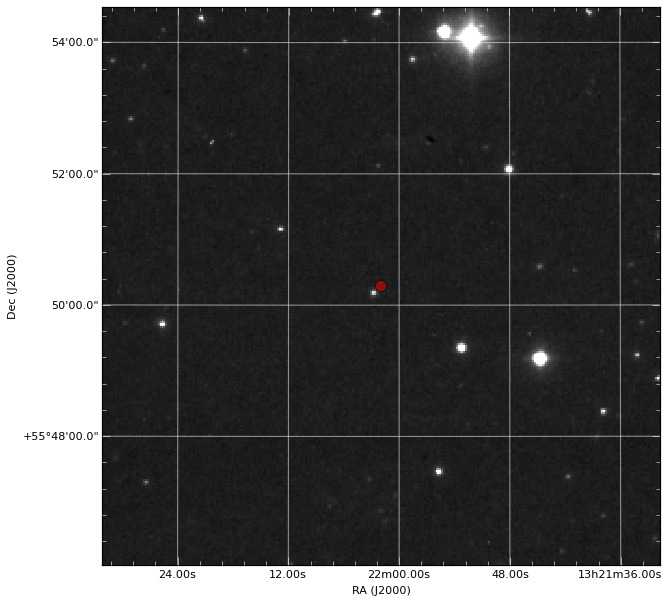

In [33]:
#This displays image of a correlated source

#Which source to show:
x=2

#Coordinates of this star:
pos=coord.SkyCoord(Big_Change_RAs[x]*u.deg, Big_Change_DEs[x]*u.deg)
ra=np.array([Big_Change_RAs[x]])
de=np.array([Big_Change_DEs[x]])
#Find image from DSS:
images = SkyView.get_images(pos,survey=['DSS'])
print images[0]

CV = aplpy.FITSFigure(images[0])


#Gives in grid and makes it grayscale (can also be made colorscale)
CV.show_grayscale()
CV.add_grid()

#This plots a circle where the relevant source should be 
x_pix, y_pix = CV.world2pixel(ra,de)
plt.scatter(x_pix, y_pix, s=100, c='red', alpha=.5)
plt.show()

0 :

INFO: Auto-setting vmin to  2.402e+03 [aplpy.core]
INFO: Auto-setting vmax to  5.561e+03 [aplpy.core]


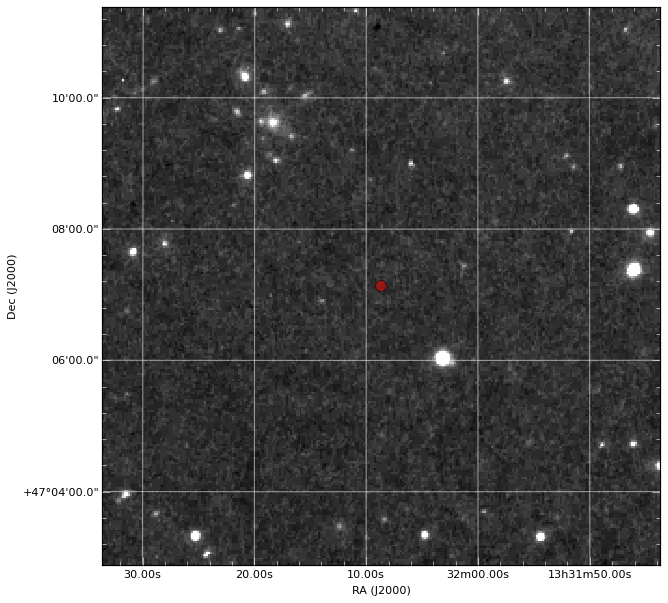

1 :

INFO: Auto-setting vmin to  1.940e+03 [aplpy.core]
INFO: Auto-setting vmax to  9.136e+03 [aplpy.core]


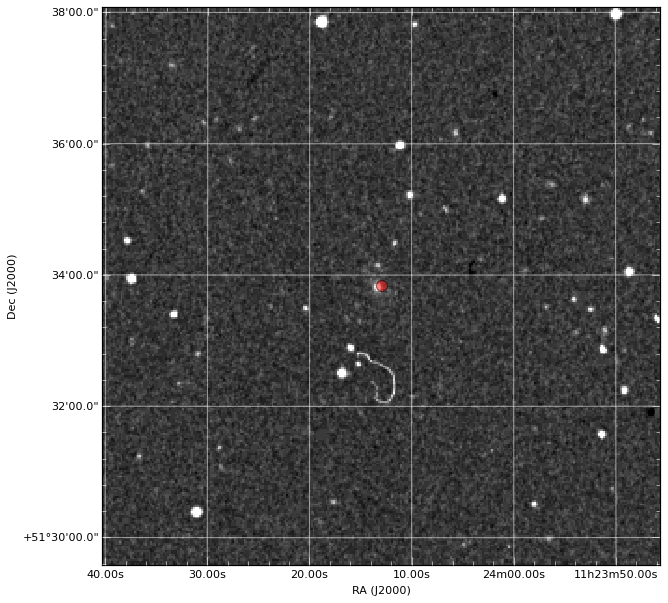

2 :

INFO: Auto-setting vmin to  1.901e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.030e+04 [aplpy.core]


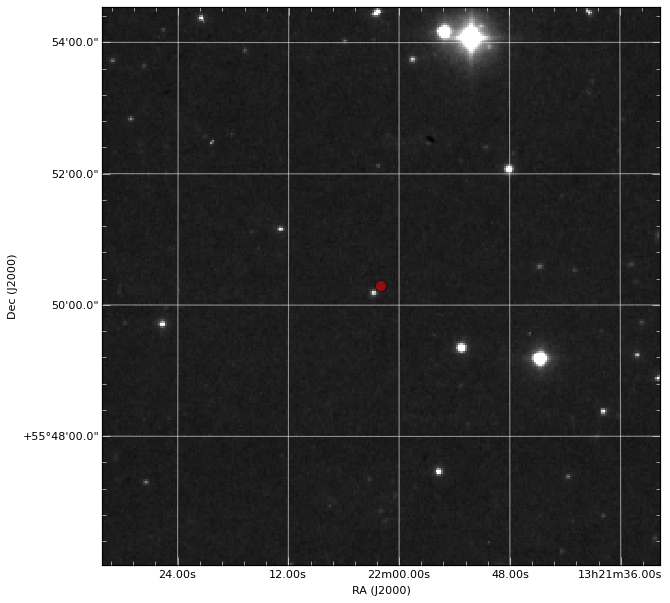

3 :

INFO: Auto-setting vmin to  2.326e+03 [aplpy.core]
INFO: Auto-setting vmax to  7.308e+03 [aplpy.core]


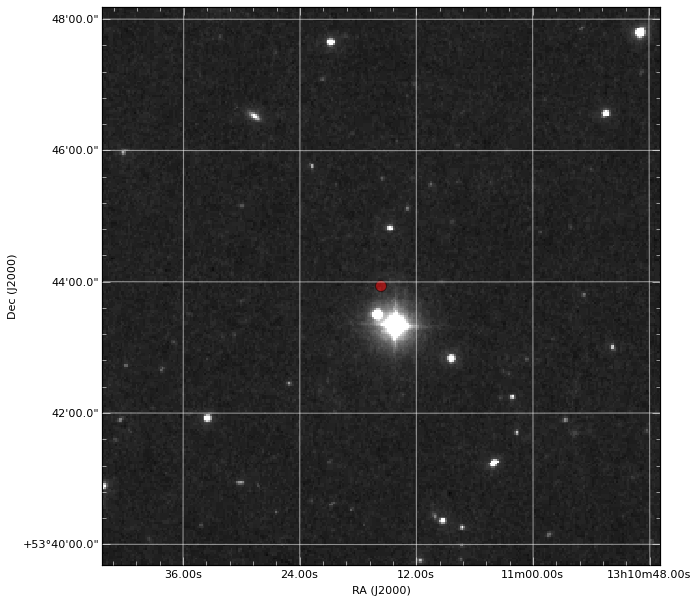

4 :

INFO: Auto-setting vmin to  1.823e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.427e+04 [aplpy.core]


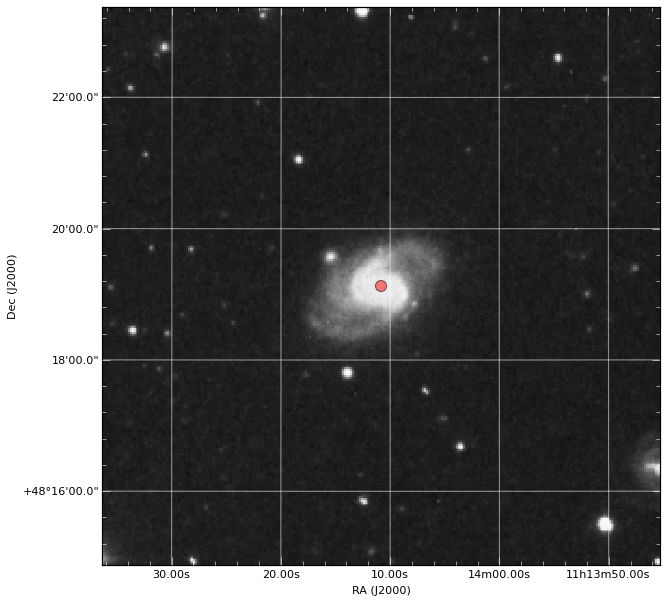

5 :

INFO: Auto-setting vmin to  2.331e+03 [aplpy.core]
INFO: Auto-setting vmax to  7.599e+03 [aplpy.core]


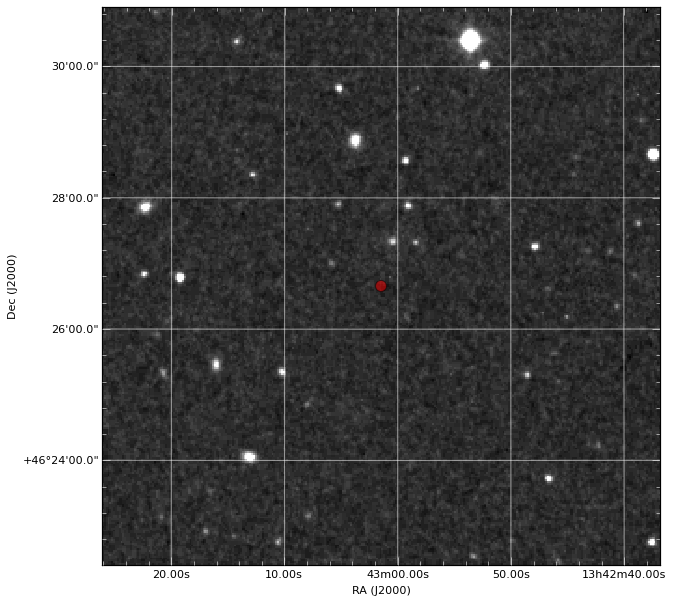

6 :

INFO: Auto-setting vmin to  2.555e+03 [aplpy.core]
INFO: Auto-setting vmax to  6.927e+03 [aplpy.core]


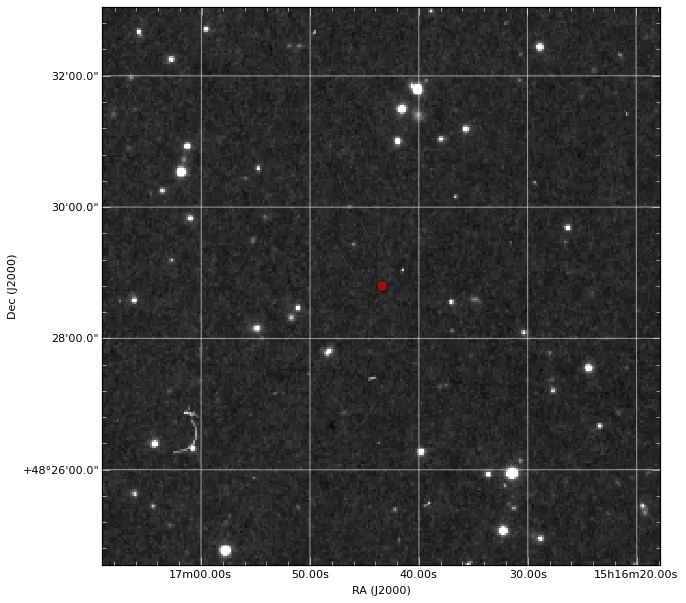

7 :

INFO: Auto-setting vmin to  2.155e+03 [aplpy.core]
INFO: Auto-setting vmax to  7.826e+03 [aplpy.core]


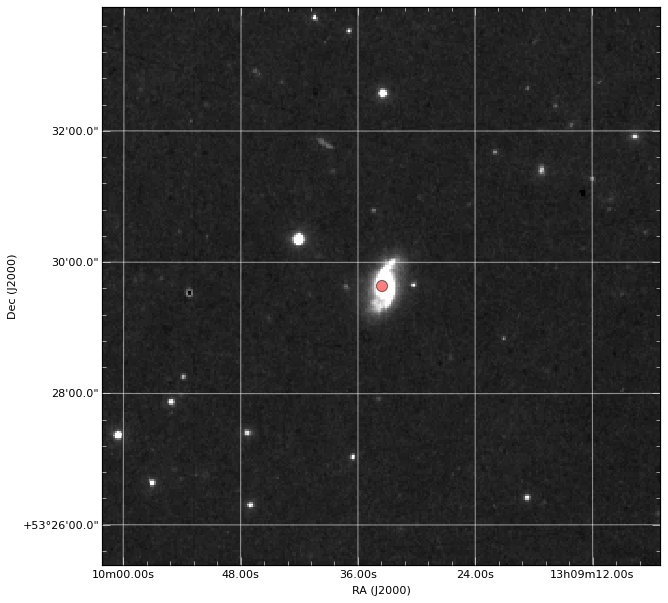

8 :

INFO: Auto-setting vmin to  1.807e+03 [aplpy.core]
INFO: Auto-setting vmax to  6.654e+03 [aplpy.core]


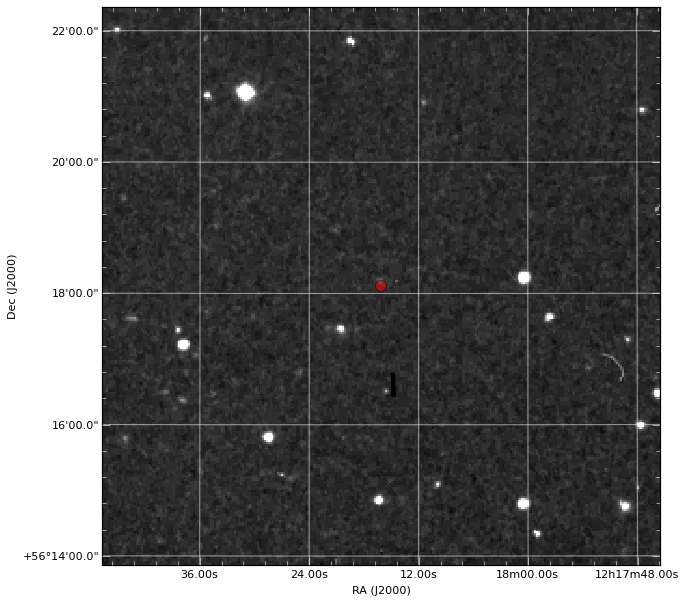

9 :

INFO: Auto-setting vmin to  2.294e+03 [aplpy.core]
INFO: Auto-setting vmax to  7.511e+03 [aplpy.core]


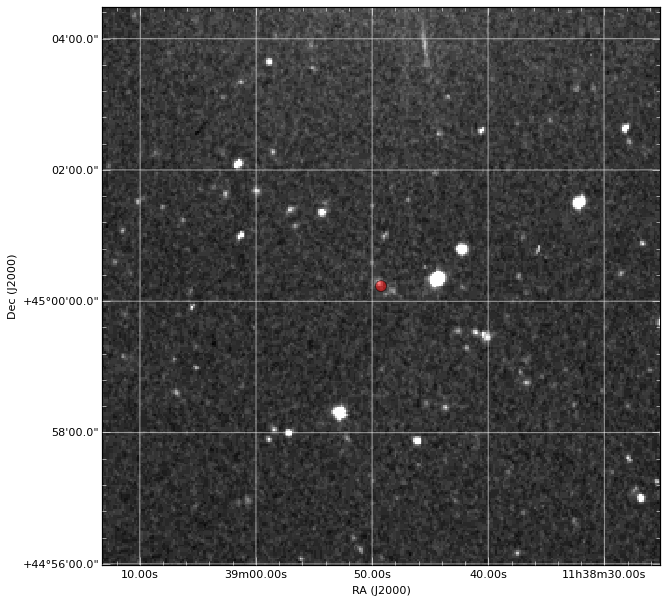

In [34]:
for x in range(10):
    print x,":"
    print ""


    #Coordinates of this star:
    pos=coord.SkyCoord(Big_Change_RAs[x]*u.deg, Big_Change_DEs[x]*u.deg)
    ra=np.array([Big_Change_RAs[x]])
    de=np.array([Big_Change_DEs[x]])
    #Find image from DSS:
    images = SkyView.get_images(pos,survey=['DSS'])
    print images[0]

    CV = aplpy.FITSFigure(images[0])


    #Gives in grid and makes it grayscale (can also be made colorscale)
    CV.show_grayscale()
    CV.add_grid()

    #This plots a circle where the relevant source should be 
    x_pix, y_pix = CV.world2pixel(ra,de)
    plt.scatter(x_pix, y_pix, s=100, c='red', alpha=.5)
    plt.show()